# Customer & Sales Analytics
## Customer Segmentation using Clustering (K-Means)

This notebook focuses on **customer segmentation using unsupervised machine learning**.  Building on the RFM analysis, we apply **K-Means clustering** to group customers with similar purchasing behavior based on **Recency, Frequency, and Monetary (RFM) scores**.
## Approach
1. Use **R_score, F_score, M_score** as features (scaled with StandardScaler)
2. Determine **optimal K** (Elbow method + Silhouette score)
3. Apply **K-Means** to group similar customers
4. **Profile and label** clusters for business interpretation
5. **Compare** with RFM segments to validate insights

This analysis complements the rule-based RFM segmentation by providing a **data-driven view of customer behavior**.




In [1]:
# customer segmentation (clustering)

# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings 
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# load data
print("\n===== LOADING RFM DATA =====")

rfm = pd.read_csv("OneDrive/Documents/Customer Sales Analytics/rfm_analysis.csv")

print(f"Customer loaded: {len(rfm):,}")
print("\nRFM Overview")
print(rfm[['recency', 'frequency', 'monetary']].describe())


===== LOADING RFM DATA =====
Customer loaded: 93,358

RFM Overview
            recency     frequency      monetary
count  93358.000000  93358.000000  93358.000000
mean     237.941773      1.033420    165.168210
std      152.591453      0.209097    226.292101
min        1.000000      1.000000      9.590000
25%      114.000000      1.000000     63.010000
50%      219.000000      1.000000    107.780000
75%      346.000000      1.000000    182.510000
max      714.000000     15.000000  13664.080000


In [3]:
rfm.head(4)

,customer_unique_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_segment,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,4,414,3.000000,Big Spenders
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,2.000000,Recent Customers
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,1.333333,Lost Customers
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,1.333333,Lost Customers


# Feature Selection (RFM Scores)

In [4]:
# feature selection (RFM scores)
print("\n===== FEATURE SELECTION =====")

cluster_features = ["R_score", "F_score", "M_score"]
X = rfm[cluster_features]
print(f"Clustering features: {cluster_features}")
print(f"Feature matrix shape: {X.shape}")


===== FEATURE SELECTION =====
Clustering features: ['R_score', 'F_score', 'M_score']
Feature matrix shape: (93358, 3)


# Feature Scaling

In [5]:
# feature scaling
print("\n===== FEATURE SCALING =====")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Feature scaled successfully")


===== FEATURE SCALING =====
Feature scaled successfully


# Find Optimal K (Elbow + Silhouette)


===== FINDING OPTIMAL K =====
Using full data (93,358 customers) for Elbow method
Using sample (10,000 customers) for silhouette score
  Testing K=2... Silhouette=0.699
  Testing K=3... Silhouette=0.374
  Testing K=4... Silhouette=0.419
  Testing K=5... Silhouette=0.447
  Testing K=6... Silhouette=0.434
  Testing K=7... Silhouette=0.427


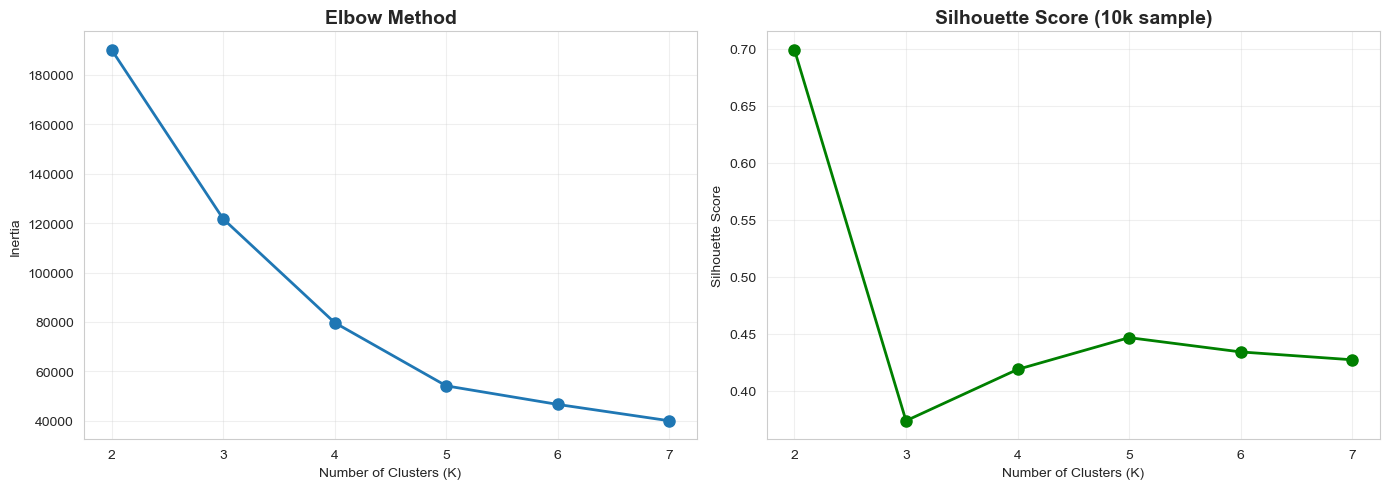


 Optimal K analysis complete


In [7]:
# finding optimal K
print("\n===== FINDING OPTIMAL K =====")
k_range = range(2, 8)
inertia = []
silhouette = []

# use full data for elbow (inertia ccalculation)
# use sample for silhouette (pairwise distance calculation)
sample_size = 10000
np.random.seed(42)
sample_idx = np.random.choice(len(X_scaled), size=min(sample_size, len(X_scaled)), replace=False)
X_sample = X_scaled[sample_idx]

print(f"Using full data ({len(X_scaled):,} customers) for Elbow method")
print(f"Using sample ({len(X_sample):,} customers) for silhouette score")

for k in k_range:
    print(f"  Testing K={k}...", end=" ")
    
    # Fit on full data
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_full = model.fit_predict(X_scaled)
    inertia.append(model.inertia_)
    
    # Silhouette on sample
    labels_sample = model.predict(X_sample)
    sil_score = silhouette_score(X_sample, labels_sample)
    silhouette.append(sil_score)
    
    print(f"Silhouette={sil_score:.3f}")

# plot evaluation metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(k_range, inertia, marker="o", linewidth=2, markersize=8)
ax[0].set_title("Elbow Method", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Inertia")
ax[0].grid(alpha=0.3)

ax[1].plot(k_range, silhouette, marker="o", color="green", linewidth=2, markersize=8)
ax[1].set_title("Silhouette Score (10k sample)", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Silhouette Score")
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Optimal K analysis complete")

# Apply K-Means

In [9]:
# applying k-means
print(f"\n===== APPLYING K-MEANS =====")
optimal_k = 4 

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["cluster"] = kmeans.fit_predict(X_scaled)

# calculate silhouette on sample for final model
final_label_sample = kmeans.predict(X_sample)
final_silhouette = silhouette_score(X_sample, final_label_sample)

print(f"Clustering completed with K = {optimal_k}")
print(f"Silhouette Score (10k sample): {final_silhouette:.3f}")



===== APPLYING K-MEANS =====
Clustering completed with K = 4
Silhouette Score (10k sample): 0.419


# Cluster Profiling

In [10]:
# cluster profiling
print("\n===== CLUSTER PROFILING =====")

cluster_profile = (
    rfm
    .groupby("cluster")
    .agg(
        customers=("customer_unique_id", "count"),
        avg_R=("R_score", "mean"),
        avg_F=("F_score", "mean"),
        avg_M=("M_score", "mean"),
        avg_recency=("recency", "mean"),
        avg_frequency=("frequency", "mean"),
        avg_monetary=("monetary", "mean"),
        total_revenue=("monetary", "sum")
    )
    .reset_index()
)

cluster_profile["percentage"] = (cluster_profile["customers"] / len(rfm) * 100).round(1)
cluster_profile = cluster_profile.sort_values("total_revenue", ascending=False)


===== CLUSTER PROFILING =====


# Label Clusters

In [11]:
# label clusters
print(f"\n===== LABELING CLUSTERS =====")

def label_cluster(cluster_id):
    profile = cluster_profile[cluster_profile['cluster'] == cluster_id].iloc[0]
    
    f = profile['avg_F']
    m = profile['avg_M']
    r = profile['avg_R']
    
    if f >= 4 and m >= 4:
        return 'Loyal High-Value'
    elif f >= 3 and m >= 3:
        return 'Emerging Loyals'
    elif m >= 4 and f < 2:
        return 'High-Spend One-Timers'
    elif r >= 4 and m < 3:
        return 'Recent Low-Spenders'
    elif r <= 2:
        return 'Inactive Customers'
    else:
        return 'Standard Customers'

cluster_profile['label'] = cluster_profile['cluster'].apply(label_cluster)

print("\n===== CLUSTER SUMMARY =====")
print(cluster_profile[['cluster', 'label', 'customers', 'percentage', 
                       'avg_recency', 'avg_frequency', 'avg_monetary', 'total_revenue']])


===== LABELING CLUSTERS =====

===== CLUSTER SUMMARY =====
   cluster                  label  customers  percentage  avg_recency  \
1        1  High-Spend One-Timers      31814        34.1   210.914063   
3        3     Standard Customers      32960        35.3   134.256007   
0        0     Inactive Customers      25783        27.6   405.756700   
2        2        Emerging Loyals       2801         3.0   220.294538   

   avg_frequency  avg_monetary  total_revenue  
1       1.000000    313.980423     9988973.18  
3       1.000000     72.587891     2392496.88  
0       1.000000     84.323633     2174116.23  
2       2.113888    308.528190      864187.46  


# Visualizations


===== VISUALIZING CLUSTERS =====


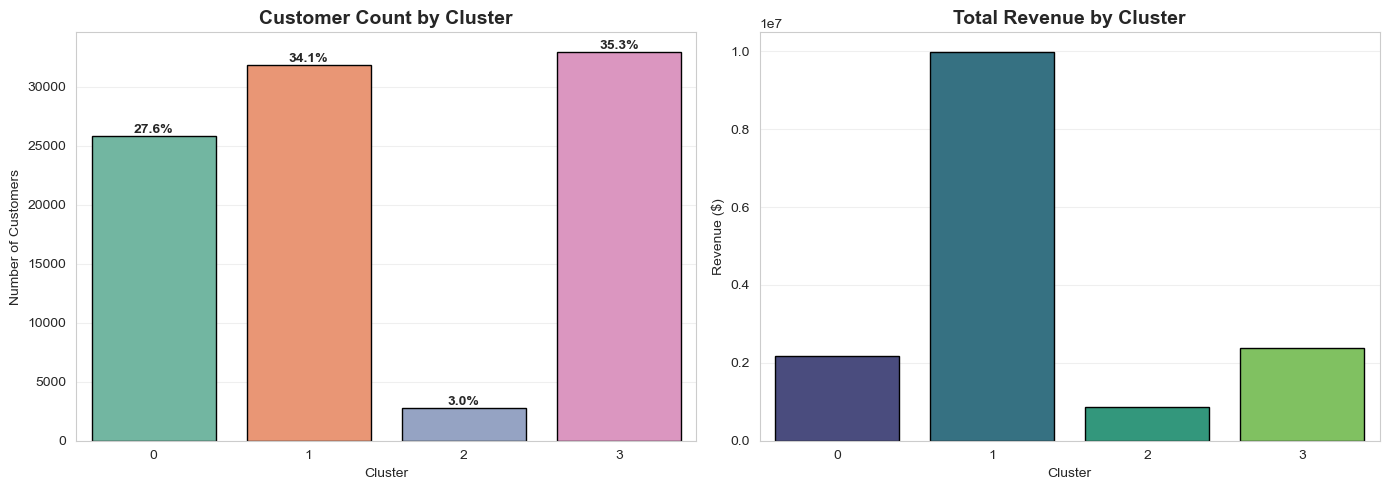

In [12]:
print("\n===== VISUALIZING CLUSTERS =====")

# Plot 1: Customer Count & Revenue by Cluster
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Customer count
sns.barplot(data=cluster_profile, x="cluster", y="customers", 
            palette="Set2", ax=ax[0], edgecolor='black')
ax[0].set_title("Customer Count by Cluster", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Cluster")
ax[0].set_ylabel("Number of Customers")
ax[0].grid(axis="y", alpha=0.3)

# Add percentage labels
for i, row in cluster_profile.iterrows():
    ax[0].text(i, row['customers'], f"{row['percentage']:.1f}%", 
               ha='center', va='bottom', fontweight='bold')

# Total revenue
sns.barplot(data=cluster_profile, x="cluster", y="total_revenue", 
            palette="viridis", ax=ax[1], edgecolor='black')
ax[1].set_title("Total Revenue by Cluster", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Cluster")
ax[1].set_ylabel("Revenue ($)")
ax[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

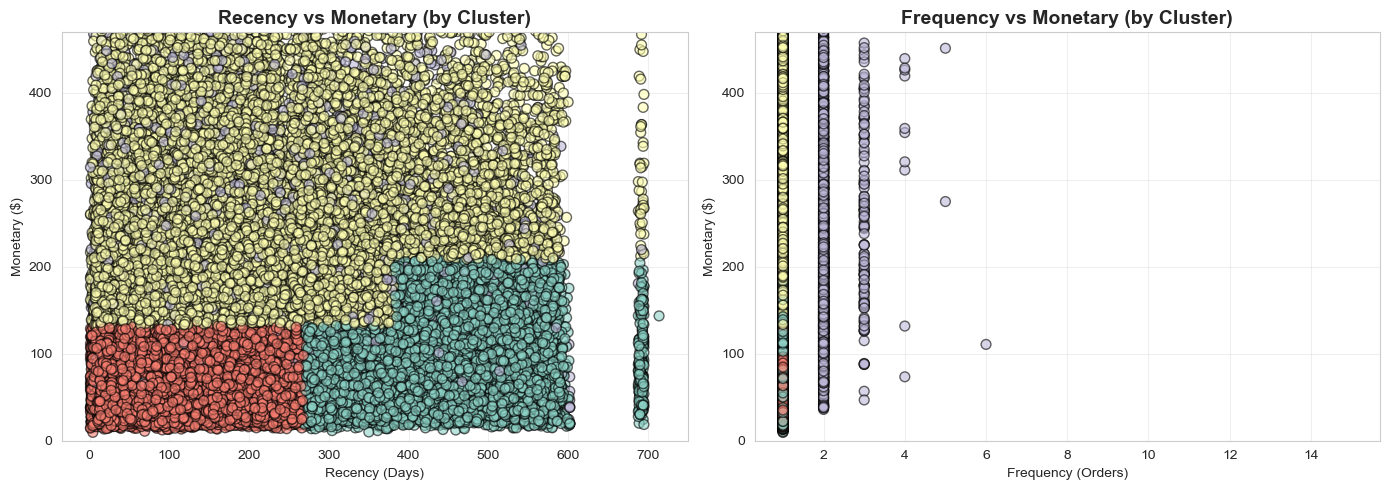

In [13]:
# plot 2: RFM Scatter Plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Recency vs Monetary
colors = plt.cm.Set3(rfm['cluster'])
ax[0].scatter(rfm['recency'], rfm['monetary'], c=colors, alpha=0.6, edgecolor='black', s=50)
ax[0].set_title('Recency vs Monetary (by Cluster)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Recency (Days)')
ax[0].set_ylabel('Monetary ($)')
ax[0].set_ylim(0, rfm['monetary'].quantile(0.95))
ax[0].grid(alpha=0.3)

# Frequency vs Monetary
ax[1].scatter(rfm['frequency'], rfm['monetary'], c=colors, alpha=0.6, edgecolor='black', s=50)
ax[1].set_title('Frequency vs Monetary (by Cluster)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Frequency (Orders)')
ax[1].set_ylabel('Monetary ($)')
ax[1].set_ylim(0, rfm['monetary'].quantile(0.95))
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Cluster vs RFM Segment Comparision

In [14]:
print("\n===== CLUSTER vs RFM SEGMENT =====")

# Add labels to rfm dataframe
rfm['cluster_label'] = rfm['cluster'].apply(label_cluster)

# Cross-tabulation
cross_tab = pd.crosstab(
    rfm['customer_segment'], 
    rfm['cluster_label'], 
    margins=True
)
print("\nRFM Segments vs K-Means Clusters:")
print(cross_tab)


===== CLUSTER vs RFM SEGMENT =====

RFM Segments vs K-Means Clusters:
cluster_label     Emerging Loyals  High-Spend One-Timers  Inactive Customers  \
customer_segment                                                               
At Risk                        82                      0                   0   
Big Spenders                    0                  31814                3290   
Champions                     990                      0                   0   
Lost Customers                  0                      0               22493   
Loyal Customers              1628                      0                   0   
Potential                     101                      0                   0   
Recent Customers                0                      0                   0   
All                          2801                  31814               25783   

cluster_label     Standard Customers    All  
customer_segment                             
At Risk                            0

# Key Insights

In [15]:
("\n===== KEY INSIGHTS =====")

top_cluster = cluster_profile.iloc[0]
largest_cluster = cluster_profile.loc[cluster_profile['customers'].idxmax()]

print(f"Top revenue cluster: {top_cluster['label']} (${top_cluster['total_revenue']:,.2f})")
print(f"Largest cluster: {largest_cluster['label']} ({largest_cluster['customers']:,} customers)")
print(f"Average cluster size: {cluster_profile['customers'].mean():.0f} customers")
print(f"Revenue concentration: Top cluster = {(top_cluster['total_revenue'] / cluster_profile['total_revenue'].sum() * 100):.1f}%")

print("\nClustering Analysis Complete")

Top revenue cluster: High-Spend One-Timers ($9,988,973.18)
Largest cluster: Standard Customers (32,960 customers)
Average cluster size: 23340 customers
Revenue concentration: Top cluster = 64.8%

Clustering Analysis Complete


# Customer Segmentation (Clustering) – Key Findings
This notebook applied **K-Means clustering** on customer behavior using **RFM-based features** to identify meaningful customer groups beyond rule-based RFM segments.

---

### Methodology

- Clustering was performed using **R, F, and M scores** derived from RFM analysis.- Features were **standardized** before applying K-Means.- Optimal number of clusters was determined using:  - **Elbow Method** (full dataset)  - **Silhouette Score** (10,000-customer sample for efficiency)- Final model used **K = 4 clusters**.
---

### Identified Customer Clusters
| Cluster Label | % Customers | Key Characteristics | Business Meaning |
|---------------|-------------|---------------------|------------------|
| **Standard Customers** | 35.3% | One-time buyers, low spend, relatively recent | Largest but low-value segment |
| **High-Spend One-Timers** | 34.1% | One purchase, very high spend | Major revenue contributors, high churn risk |
| **Inactive Customers** | 27.6% | Long time since last purchase | Likely churned customers |
| **Emerging Loyals** | 3.0% | Repeat purchases, high spending | High growth & retention pote|

---

### Revenue Contribution Insights- **High-Spend One-Timers** generate the **highest total revenue**, despite no repeat behavior.- **Emerging Loyals**, though small in size, show strong average spending and frequency.- **Standard Customers** form the largest base but contribute modest revenue per customer.- **Inactive Customers** represent churned or near-churn users with recovery potential.
---

### Key Business Takeaways
- Revenue is **highly concentrated** in a small subset of customers.- Retaining or reactivating **High-Spend One-Timers** can yield immediate gains.- **Emerging Loyals** should be prioritized for loyalty programs and engagement.- **Inactive Customers** require win-back or reactivation strategies.









ial |










In [16]:
# save results
print("\n===== SAVING RESULTS =====")

# Save RFM with clusters
rfm.to_csv("OneDrive/Documents/Customer Sales Analytics/rfm_with_clusters.csv", index=False)
print("RFM with clusters saved")

# Save cluster profiles
cluster_profile.to_csv("OneDrive/Documents/Customer Sales Analytics/cluster_profiles.csv", index=False)
print("Cluster profiles saved")



===== SAVING RESULTS =====
RFM with clusters saved
Cluster profiles saved
